In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm   
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm 
pd.set_option('display.max_columns', 500)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso   
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae   
from sklearn.metrics import r2_score  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Reading data

In [ ]:
df = pd.read_csv('listings_summary.csv') 
df.head(5)    

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [ ]:
columns_to_keep = ['id','host_has_profile_pic','host_since','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                   'host_is_superhost','description',
                   'latitude', 'longitude','is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'price', 'cleaning_fee',
                   'review_scores_rating','reviews_per_month','number_of_reviews',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value',
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy','availability_365']


df = df[columns_to_keep].set_index('id') 
df.head(2)

,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,t,2008-08-18,Brunnenstr. Süd,Mitte,t,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$30.00,93.0,3.76,118,10.0,9.0,10.0,10.0,10.0,9.0,$200.00,$28.00,1,4,f,f,strict_14_with_grace_period,141
2695,t,2008-09-16,Prenzlauer Berg Nordwest,Pankow,f,In the summertime we are spending most of our ...,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,100.0,1.42,6,10.0,10.0,10.0,10.0,10.0,10.0,$0.00,$0.00,1,2,f,f,flexible,0


In [ ]:
df.shape

(22552, 96)

In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

# Null Values
### Inspection + Handling

In [ ]:
df.isnull().sum()    

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                  59
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   3914
Length: 96, dtype: int64

In [ ]:
df["review_scores_value"].value_counts()

10.0    10020
9.0      6376
8.0      1306
6.0       181
7.0       161
4.0        36
2.0        23
5.0        12
3.0         2
Name: review_scores_value, dtype: int64

# f/t to int

In [ ]:
df['is_location_exact'] = df['is_location_exact'].map({'f':0,'t':1})   
df['host_is_superhost'] = df['host_is_superhost'].map({'f':0,'t':1})
df['is_business_travel_ready'] = df['is_business_travel_ready'].map({'f':0,'t':1})
df['instant_bookable'] = df['instant_bookable'].map({'f':0,'t':1})

In [ ]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,1.0,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,0,0,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,0.0,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,0,0,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,20

# Profile Pics

In [ ]:
df['host_has_profile_pic'].unique()
df['host_has_profile_pic'].nunique()  
df['host_has_profile_pic'].value_counts(dropna=False)   

t      22470
f         56
NaN       26
Name: host_has_profile_pic, dtype: int64

In [ ]:
df['host_has_profile_pic'].fillna('f',inplace=True)  

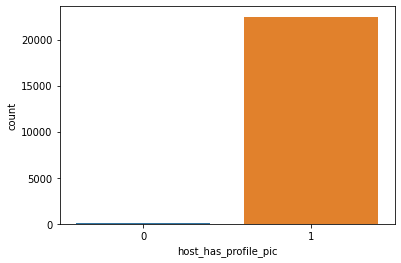

In [ ]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f':0,'t':1})
sns.countplot(x='host_has_profile_pic',data=df)

In [ ]:
df['host_has_profile_pic'].value_counts()

1    22470
0       82
Name: host_has_profile_pic, dtype: int64

# Price

In [ ]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)  
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
df['extra_people'] = df['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Fut

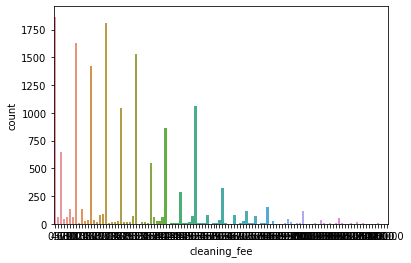

In [ ]:
df['cleaning_fee'].value_counts(dropna=False)

sns.countplot(x='cleaning_fee',data=df)

In [ ]:
df['cleaning_fee'].fillna(df['cleaning_fee'].mean(), inplace=True)
df['cleaning_fee'].isna().sum()

0

In [ ]:
df['security_deposit'].fillna(df['security_deposit'].mean(), inplace=True)
df['security_deposit'].isna().sum()

0

In [ ]:
df['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [ ]:
len(df[df['price']==0])
to_drop = list(df[df['price']==0].index)

In [ ]:
df.drop(to_drop, inplace=True)
df.reset_index(inplace=True)
df['price'] = np.log1p(df['price'])  

In [ ]:
len(df[df['price']==0])

0

(array([1.0000e+00, 2.6000e+01, 2.0380e+03, 1.2248e+04, 6.9970e+03,
        1.0720e+03, 1.1100e+02, 1.7000e+01, 8.0000e+00, 2.6000e+01]),
 array([0.69314718, 1.53434156, 2.37553594, 3.21673031, 4.05792469,
        4.89911907, 5.74031345, 6.58150783, 7.42270221, 8.26389658,
        9.10509096]),
 <a list of 10 Patch objects>)

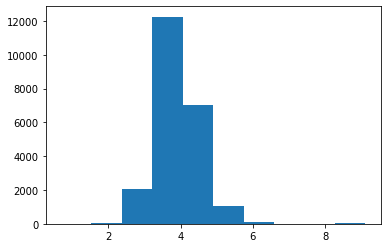

In [ ]:
plt.hist(df['price'])   

In [ ]:
df['price'].value_counts()

3.433987    1387
3.583519    1256
3.931826    1247
3.713572    1191
3.258097    1121
            ... 
5.572154       1
5.802118       1
6.045005       1
6.098074       1
7.313887       1
Name: price, Length: 294, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.149665
Kurtosis: 5.184078


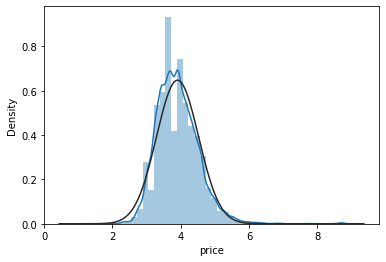

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())    

# Room Types

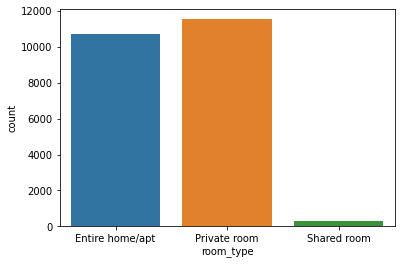

In [ ]:
sns.countplot(x='room_type',data=df)

# Neighbourhood Group

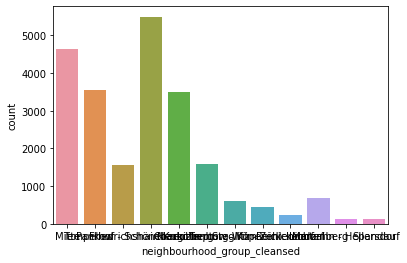

In [ ]:
sns.countplot(x='neighbourhood_group_cleansed',data=df)

# Neighbourhood

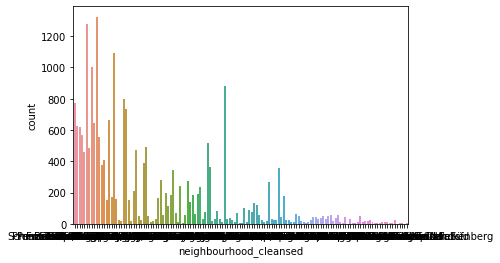

In [ ]:
sns.countplot(x='neighbourhood_cleansed',data=df)

In [ ]:
z = df['neighbourhood_cleansed'].value_counts() 

In [ ]:
print(z)

Tempelhofer Vorstadt                  1324
Frankfurter Allee Süd FK              1280
Alexanderplatz                        1091
Reuterstraße                          1002
Rixdorf                                880
                                      ... 
Malchow, Wartenberg und Falkenberg       3
Allende-Viertel                          3
Neu-Hohenschönhausen Süd                 2
MV 2                                     1
Hellersdorf-Ost                          1
Name: neighbourhood_cleansed, Length: 136, dtype: int64


In [ ]:
others = []
for i in set(df['neighbourhood_cleansed']):
    if z[i]<100:
        others.append(i)
len(others)

90

In [ ]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:   
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|██████████| 22544/22544 [00:02<00:00, 11185.84it/s]


In [ ]:
len(df['neighbourhood_cleansed'].value_counts())

47

## Propery Type

In [ ]:
z = df['property_type'].value_counts()

In [ ]:
others = []
for i in set(df['property_type']):
    if z[i]<100:
        others.append(i)
len(others)

27

In [ ]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|██████████| 22544/22544 [00:00<00:00, 85832.39it/s]


In [ ]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|██████████| 22544/22544 [00:00<00:00, 81744.99it/s]


# Bathrooms

In [ ]:
df['bathrooms'].value_counts(dropna=False)

1.0    19801
2.0     1268
1.5     1145
0.5      104
2.5       74
3.0       50
0.0       41
NaN       32
4.0       12
3.5        3
7.0        3
8.5        3
5.0        2
7.5        2
8.0        2
4.5        1
6.0        1
Name: bathrooms, dtype: int64

In [ ]:
df['bathrooms'].fillna(1,inplace=True)

# Bedroom

In [ ]:
df['bedrooms'].value_counts()

1.0     17159
2.0      2970
0.0      1477
3.0       723
4.0       143
5.0        34
6.0        10
8.0         4
7.0         3
10.0        1
12.0        1
9.0         1
Name: bedrooms, dtype: int64

In [ ]:
df['bedrooms'].fillna(1,inplace=True)

# Host Details

In [ ]:
z = df['host_since'].isnull()
z = list(df[z].index)           

df.drop(z,inplace=True)
df.reset_index(inplace=True)

z = df['host_is_superhost'].isnull()
z = list(df[z].index)

df.drop(z,inplace=True)
df.reset_index(inplace=True)


ValueError: ignored

# Reviews

In [ ]:
dropped = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']
df.drop(dropped,axis=1,inplace=True)   

In [ ]:
df.head()

,level_0,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
0,0,0,2015,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4.110874,30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141
1,1,1,2695,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2.890372,0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0
2,2,2,3176,1,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,This beautiful first floor apartment is situa...,52.534996,13.417579,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",4.510860,50.0,1.25,143,200.0,20.0,2,62,1,0,strict_14_with_grace_period,220
3,3,3,3309,1,2008-11-07,Schöneberg-Nord,Tempelhof - Schöneberg,0.0,First of all: I prefer short-notice bookings. ...,52.498855,13.349065,1,Apartment,Private room,2,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",3.295837,30.0,0.39,25,250.0,18.0,1,5,0,0,strict_14_with_grace_period,297
4,4,4,7071,1,2009-05-16,Helmholtzplatz,Pankow,1.0,Cozy and large room in the beautiful district ...,52.543157,13.415091,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",3.761200,0.0,1.75,197,0.0,24.0,1,2,0,0,moderate,26


# Cancellation

In [ ]:
df['cancellation_policy'].value_counts(dropna=False)

flexible                       9082
moderate                       7086
strict_14_with_grace_period    6283
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

# Dropping features

In [ ]:
y = df['price']
df.drop(['price'],axis=1,inplace=True)    

KeyError: ignored

In [ ]:
df.isnull().sum()   #this tells you which column has how many null vvalues

level_0                            0
index                              0
id                                 0
host_has_profile_pic               0
host_since                         0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
host_is_superhost                  0
description                      203
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
bed_type                           0
amenities                          0
cleaning_fee                       0
reviews_per_month               3901
number_of_reviews                  0
security_deposit                   0
extra_people                       0
guests_included                    0
minimum_nights                     0
instant_bookable                   0
i

## Size estimation

In [ ]:
df['description']

KeyError: ignored

In [ ]:
df['size'] = df['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)        #string preprocessing,  # took size from description
df['size'] = df['size'].str.replace("\D", "")   # modified/cleaned the size obtained
df['size'] = df['size'].astype(float)   # changed it to float because it was string


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df['size'].value_counts(dropna=False)

NaN      11778
10.0      2331
15.0      1263
20.0       857
30.0       444
         ...  
144.0        1
688.0        1
147.0        1
126.0        1
240.0        1
Name: size, Length: 219, dtype: int64

In [ ]:
cols = ['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'size']

sub_df = df[cols]

df.drop(cols,inplace=True, axis=1)

In [ ]:
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

y_train = train_data['size']

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test = linreg.predict(X_test)

In [ ]:
mse(y_train,linreg.predict(X_train)),r2_score(y_train,linreg.predict(X_train))    # mse= mean square error. mean of square of errors. the less it is, the better results are
# mse shouls be less and r2_score should be aound 1.. both re reverse which means model is bad


(13101.20952169146, 0.026865995167252188)

In [ ]:
y_test = pd.DataFrame(y_test)   # made y_test a dataframe
y_test.columns = ['size'] # named it as size.

In [ ]:
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)

In [ ]:
new_test_data = pd.concat([X_test, y_test], axis=1)
sub_df_new = pd.concat([new_test_data, train_data], axis=0)
df = pd.concat([sub_df_new, df], axis=1)

In [ ]:
sub_df_new.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'security_deposit', 'extra_people', 'guests_included', 'size'],
      dtype='object')

In [ ]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,level_0,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
0,3,1.0,1.0,30.0,200.0,28.0,1,75.0,0,0,2015,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",3.76,118,4,0,0,strict_14_with_grace_period,141
1,2,1.0,1.0,0.0,0.0,0.0,1,25.0,1,1,2695,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",1.42,6,2,0,0,flexible,0
2,4,1.0,1.0,50.0,200.0,20.0,2,68.0,2,2,3176,1,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,This beautiful first floor apartment is situa...,52.534996,13.417579,1,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",1.25,143,62,1,0,strict_14_with_grace_period,220
3,2,1.0,1.0,30.0,250.0,18.0,1,26.0,3,3,3309,1,2008-11-07,Schöneberg-Nord,Tempelhof - Schöneberg,0.0,First of all: I prefer short-notice bookings. ...,52.498855,13.349065,1,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.39,25,5,0,0,strict_14_with_grace_period,297
4,2,1.0,1.0,0.0,0.0,24.0,1,20.0,4,4,7071,1,2009-05-16,Helmholtzplatz,Pankow,1.0,Cozy and large room in the beautiful district ...,52.543157,13.415091,1,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",1.75,197,2,0,0,moderate,26


In [ ]:
dropped = ['index','id','level_0','description']
df.drop(dropped,axis=1,inplace=True)


In [ ]:
df.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'security_deposit', 'extra_people', 'guests_included', 'size',
       'host_has_profile_pic', 'host_since', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'host_is_superhost', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'reviews_per_month', 'number_of_reviews',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'availability_365'],
      dtype='object')

# Data processing

In [ ]:
df.amenities

0        {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1        {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
2        {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
3        {Internet,Wifi,"Pets allowed","Pets live on th...
4        {Wifi,Heating,"Family/kid friendly",Essentials...
                               ...                        
22513    {Wifi,"Smoking allowed",Heating,Essentials,Sha...
22514    {TV,Wifi,Kitchen,"Free parking on premises","F...
22515    {Wifi,Kitchen,Heating,Washer,"Fire extinguishe...
22516    {Wifi,"Paid parking off premises",Doorman,Elev...
22517    {Wifi,"Air conditioning",Kitchen,Breakfast,Hea...
Name: amenities, Length: 22518, dtype: object

In [ ]:
for i in tqdm(range(len(df))):
    df.loc[i,'No_of_amentities'] = len(df.loc[i,'amenities'].split(','))

100%|██████████| 22518/22518 [00:07<00:00, 3073.20it/s]


In [ ]:
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')
df['Hot_water'] = df['amenities'].str.contains('Hot water')
df['Fridge'] = df['amenities'].str.contains('Refrigerator')


In [ ]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,price,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge
0,3,1.0,1.0,30.0,200.0,28.0,1,75.0,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,52.534537,13.402557,0,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4.110874,3.76,118,4,0,0,strict_14_with_grace_period,141,29.0,True,True,True,False,False,True,True
1,2,1.0,1.0,0.0,0.0,0.0,1,25.0,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,52.548513,13.404553,1,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2.890372,1.42,6,2,0,0,flexible,0,10.0,True,False,False,False,False,False,False
2,4,1.0,1.0,50.0,200.0,20.0,2,68.0,1,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,52.534996,13.417579,1,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",4.510860,1.25,143,62,1,0,strict_14_with_grace_period,220,19.0,True,False,True,False,False,False,False
3,2,1.0,1.0,30.0,250.0,18.0,1,26.0,1,2008-11-07,Schöneberg-Nord,Tempelhof - Schöneberg,0.0,52.498855,13.349065,1,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",3.295837,0.39,25,5,0,0,strict_14_with_grace_period,297,29.0,True,False,False,True,False,True,False
4,2,1.0,1.0,0.0,0.0,24.0,1,20.0,1,2009-05-16,Helmholtzplatz,Pankow,1.0,52.543157,13.415091,1,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",3.761200,1.75,197,2,0,0,moderate,26,13.0,True,False,True,False,False,True,False


In [ ]:
dropped = ['amenities']
df.drop(dropped,axis=1,inplace=True)

In [ ]:
category = ['neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type',
           'bed_type','cancellation_policy']

for i in category:
    df[i] = df[i].astype('category')



In [ ]:
# for i in category:
#     df[i] = df[i].cat.codes

# # df['room_type'] = df['room_type'].cat.codes
# # df['neighbourhood'] = df['neighbourhood'].cat.codes
# # df['neighbourhood_group'] = df['neighbourhood_group'].cat.codes

# Feature Engineering

### Duration

In [ ]:
df.host_since.isnull().sum()
df.host_since.value_counts()

4.756164     51
8.265753     51
6.482192     41
5.841096     34
5.761644     34
             ..
10.945205     1
11.049315     1
13.191781     1
10.153425     1
3.046575      1
Name: host_since, Length: 2914, dtype: int64

In [ ]:
from dateutil import parser

def diff_date(row):
    today = parser.parse('2021-11-22')
    return ((today - parser.parse(row['host_since'])).days)/365


In [ ]:
df['host_since'] = df.apply(diff_date,axis=1)   # .apply is used to apply something on the entire dataset
df['host_since'].describe()

TypeError: ignored

### Distances

In [ ]:
from math import sin, cos, sqrt, atan2, radians
def haversine_distance_central(row):
    berlin_lat,berlin_long = radians(52.5200), radians(13.4050)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [ ]:
def haversine_distance_airport(row):
    berlin_lat,berlin_long = radians(52.3733), radians(13.5064)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [ ]:
def haversine_distance_rail(row):
    berlin_lat,berlin_long = radians(52.5073), radians(13.3324)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [ ]:
df['distance_central'] = df.apply(haversine_distance_central,axis=1)
df['distance_airport'] = df.apply(haversine_distance_airport,axis=1)
df['distance_railways'] = df.apply(haversine_distance_airport,axis=1)
df['distance_avg'] = ( df['distance_central'] + df['distance_airport'] + df['distance_railways'] )/3.0

In [ ]:
df['distance_avg'].describe()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
i=20
for i in df.columns[i:i+1]:
    print(i,set(df[i]))


reviews_per_month {nan, 1.25, 1.75, 0.75, nan, nan, 0.5, 1.0, 2.25, 6.43, 2.0, 3.5, 2.5, 2.75, 5.0, nan, 3.75, 17.01, 3.25, 3.0, nan, 4.75, 4.0, 4.5, 4.25, nan, 5.75, 5.5, 5.25, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 8.25, 8.75, 7.5, 36.67, 8.0, 9.25, 10.25, 10.75, 10.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.72, 4.97, 5.72, 5.47, 5.22, nan, nan, 6.47, 6.72, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 8.44, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.59, 0.84, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.09, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [ ]:
for c in category:
    df[c+'_freq'] = df[c].map(df.groupby(c).size() / df.shape[0])   # shape is rows* columns.. shape[0]--rows, shape[1]--columns
    indexer = pd.factorize(df[c], sort=True)[1]
    df[c] = indexer.get_indexer(df[c])
    print(df[c+'_freq'].value_counts())

0.109424    2464
0.058664    1321
0.056755    1278
0.048361    1089
0.044365     999
0.039080     880
0.035305     795
0.034328     773
0.032596     734
0.029399     662
0.028511     642
0.027622     622
0.027445     618
0.025180     567
0.024603     554
0.022959     517
0.021716     489
0.021494     484
0.021050     474
0.020384     459
0.018252     411
0.017275     389
0.016742     377
0.008082     364
0.016120     363
0.015721     354
0.015365     346
0.012390     279
0.012124     273
0.011902     268
0.010703     241
0.010481     236
0.009415     212
0.008882     200
0.008349     188
0.007949     179
0.007505     169
0.007461     168
0.007105     160
0.006883     155
0.006839     154
0.006128     138
0.005995     135
0.005373     121
0.005107     115
0.004530     102
Name: neighbourhood_cleansed_freq, dtype: int64
0.243539    5484
0.205347    4624
0.157119    3538
0.155165    3494
0.070610    1590
0.069234    1559
0.030509     687
0.026423     595
0.019407     437
0.010925     246


In [ ]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,size,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,bed_type,price,reviews_per_month,number_of_reviews,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,distance_central,distance_airport,distance_railways,distance_avg,neighbourhood_cleansed_freq,neighbourhood_group_cleansed_freq,property_type_freq,room_type_freq,bed_type_freq,cancellation_policy_freq
0,3,1.0,1.0,30.0,200.0,28.0,1,75.0,1,13.271233,5,4,1.0,52.534537,13.402557,0,16,0,4,4.110874,3.76,118,4,0,0,2,141,29.0,True,True,True,False,False,True,True,1.625414,19.266232,19.266232,13.385959,0.034328,0.205347,0.002531,0.475442,0.965183,0.279021
1,2,1.0,1.0,0.0,0.0,0.0,1,25.0,1,13.191781,27,6,0.0,52.548513,13.404553,1,1,1,4,2.890372,1.42,6,2,0,0,0,0,10.0,True,False,False,False,False,False,False,3.171617,20.675116,20.675116,14.840616,0.027622,0.157119,0.896838,0.511413,0.965183,0.403322
2,4,1.0,1.0,50.0,200.0,20.0,2,68.0,1,13.101370,30,6,0.0,52.534996,13.417579,1,1,0,4,4.510860,1.25,143,62,1,0,2,220,19.0,True,False,True,False,False,False,False,1.872657,18.966373,18.966373,13.268467,0.027445,0.157119,0.896838,0.475442,0.965183,0.279021
3,2,1.0,1.0,30.0,250.0,18.0,1,26.0,1,13.049315,36,10,0.0,52.498855,13.349065,1,1,1,3,3.295837,0.39,25,5,0,0,2,297,29.0,True,False,False,True,False,True,False,4.457682,17.574477,17.574477,13.202212,0.025180,0.069234,0.896838,0.511413,0.019984,0.279021
4,2,1.0,1.0,0.0,0.0,24.0,1,20.0,1,12.528767,10,6,1.0,52.543157,13.415091,1,1,1,4,3.761200,1.75,197,2,0,0,1,26,13.0,True,False,True,False,False,True,False,2.664743,19.880937,19.880937,14.142206,0.020384,0.157119,0.896838,0.511413,0.965183,0.314682


In [ ]:
df.isna().sum()

accommodates                            0
bathrooms                               0
bedrooms                                0
cleaning_fee                            0
security_deposit                        0
extra_people                            0
guests_included                         0
size                                    0
host_has_profile_pic                    0
host_since                              0
neighbourhood_cleansed                  0
neighbourhood_group_cleansed            0
host_is_superhost                       0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
bed_type                                0
price                                   0
reviews_per_month                    3901
number_of_reviews                       0
minimum_nights                          0
instant_bookable                  

In [ ]:
df['reviews_per_month'].value_counts()   #check distribution, if skewed, then mediun, else mean

0.54     3972
0.03      618
0.07      398
0.06      359
0.10      333
         ... 
7.93        1
5.88        1
6.42        1
5.24        1
10.00       1
Name: reviews_per_month, Length: 768, dtype: int64

In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)
df.shape

(22518, 45)

 # Model

In [ ]:
X_train, X_val , y_train, y_val = train_test_split(df,y,test_size=0.3)

In [ ]:
scaler = StandardScaler()         # onject is created of class StandardScalar
scaler.fit_transform(X_train)     # scalar-- it will scale the vales and fit it  # this isdone to fit  values in certain range # mean=0, sd=1
scaler.transform(X_val)

ValueError: could not convert string to float: 'Meine schöne 1 Zimmer Wohnung mitten in Berlin. 50m entfernt von der U8 Pankstraße. Sodass alle Sehenswürdigkeiten in Berlin leicht erreichbar sind. Interessante Umgebung mit urigen Bars und Restaurants. Beste Tapas, gegrillte Hähnchen und Kebabs in Berlin. In meiner vollsanierten und sauberen Wohnung findest du ein großes Bett und ein saniertes Badezimmer mit Badewanne. Die Küche ist sehr gut ausgestattet. Meine Unterkunft ist gut für paare, alleinreisende abenteurer und geschäftsreisende.'

## Linear Regression

In [ ]:
model = Lasso(alpha=1e-6)     # an instance of model is created.... 

In [ ]:
model.fit(X_train,y_train)    # input features and output labels

ValueError: could not convert string to float: 'Meine schöne 1 Zimmer Wohnung mitten in Berlin. 50m entfernt von der U8 Pankstraße. Sodass alle Sehenswürdigkeiten in Berlin leicht erreichbar sind. Interessante Umgebung mit urigen Bars und Restaurants. Beste Tapas, gegrillte Hähnchen und Kebabs in Berlin. In meiner vollsanierten und sauberen Wohnung findest du ein großes Bett und ein saniertes Badezimmer mit Badewanne. Die Küche ist sehr gut ausgestattet. Meine Unterkunft ist gut für paare, alleinreisende abenteurer und geschäftsreisende.'

In [ ]:
train_rmse =(r2_score(y_train, model.predict(X_train)))
test_rmse =(r2_score(y_val, model.predict(X_val)))
print('Train r2 score= ',train_rmse)
print('Test r2 score= ',test_rmse)


NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
for i in range(len(model.coef_)):     # printing the weights(coefficient) of model
    print(df.columns[i],' ',model.coef_[i])

## LightGBM

In [ ]:
for i in range(len(X_train.columns)):
    print(i,' ',X_train.columns[i])         # printing columns

In [ ]:
import lightgbm as lgbm
params = {'objective': 'regression',
          'metric': 'rmse',
          'learning_rate':0.01,
          'max_depth':5                   # this we need to define manually
         } 
train_set = lgbm.Dataset(X_train,y_train, silent=True)
model = lgbm.train(params, train_set=train_set,num_boost_round=1000,categorical_feature=[2,3,8,9,13,21])

In [ ]:
yp_train = model.predict(X_train)
yp_val = model.predict(X_val)

In [ ]:
train_r2 =(r2_score(y_train, yp_train))
test_r2 =(r2_score(y_val, yp_val))
    
print('Train r2 score= ',train_r2)
print('Test r2 score= ',test_r2)


In [ ]:
train_rmse =(mse(y_train, yp_train))
test_rmse =(mse(y_val, yp_val))       # mse should be less
    
print('Train error= ',train_rmse)
print('Test error= ',test_rmse)


In [ ]:
def adj_r2(r2,n,p):
    return 1- ((1-r2)*(n-1))/(n-p-1)

In [ ]:
adj_r2(train_r2,X_train.shape[0],X_train.shape[1])

In [ ]:
adj_r2(test_r2,X_val.shape[0],X_val.shape[1])

In [ ]:
# r2 score and adjusted r2 score should be high.. error should be low
